In [ ]:
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.feature import ShapelyFeature
import tarfile
# from USGS https://www.sciencebase.gov/catalog/item/581d051de4b08da350d523cc
fname = 'countyl010g_shp_nt00964.tar.gz'

# Need to open Zip File
if (fname.endswith("tar.gz")):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif (fname.endswith("tar")):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

#read contents of Zip that has county boundareis
reader = shpreader.Reader('countyl010g.shp')

counties = list(reader.geometries())

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

plt.figure(figsize=(16, 14))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')

ax.coastlines('50m')

#US all counties
# ax.set_extent([-128, -65, 26, 46])
# # CT, MA, NY, VA, DEL
# ax.set_extent([-83, -65, 33, 44])
# plt.show()
# #Western States
# ax.set_extent([-125, -102, 26, 50])
# Southern States
#Florida, Alabama, Georgia
ax.set_extent([-93, -65, 25, 44])
plt.show()
# Southern States
#ax.set_extent([-93, -65, 22, 44])
#East to Mississippi River
# ax.set_extent([-93, -65, 25, 46])
# plt.show()


In [ ]:
#US all counties
ax.set_extent([-128, -65, 26, 46])
plt.show()

In [ ]:
# CT, MA, NY, VA, DEL
ax.set_extent([-83, -65, 33, 44])

plt.show()

In [ ]:
ax.set_extent([-83, -25, 33, 44])

plt.show()

In [ ]:
#Whole US (lower 48)



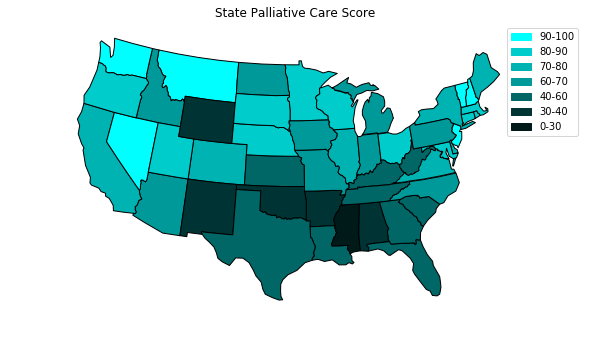

In [51]:
from tkinter import*
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

fig = plt.figure(figsize=(8,10))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

pal_score = {
    'Alabama' : 32,
    'Alaska' : 25,
    'Arizona':  68.4,
    'Arkansas':  31.6,
    'California':  74,
    'Colorado' : 75.7,
    'Connecticut': 84 ,
    'Delaware':    75,
    'District of Columbia': 71.4,
    'Florida':     58.1,
    'Georgia':     55.2,
    'Hawaii' : 70,
    'Idaho' : 66.7,
    'Illinois': 72.1,
    'Indiana':  67.7,
    'Iowa':  66.7,
    'Kansas':  48.5,
    'Kentucky':   53.1,
    'Louisiana':   55.8,
    'Maine': 78.6,
    'Maryland':   87.5,
    'Massachusetts': 87.8,
    'Michigan':    66.7,
    'Minnesota':  81.6,
    'Mississippi':   28.9,
    'Missouri':    66.7,
    'Montana':     100,
    'Nebraska':    87.50,
    'Nevada':  91.7,
    'New Hampshire':   100,
    'New Jersey': 91.2 ,
    'New Mexico':  35.7,
    'New York':  78.1 ,
    'North Carolina':  65.30,
    'North Dakota':  66.7,
    'Ohio':  82.8,
    'Oklahoma': 34.9,
    'Oregon':  88.9,
    'Pennsylvania':  68.3,
    'Rhode Island': 88.9 ,
    'South Carolina':  58.1,
    'South Dakota':  88.9,
    'Tennessee':   56,
    'Texas':   42.9,
    'Utah':  84.6,
    'Vermont':    100,
    'Virginia':    76.9,
    'Washington':  92.7,
    'West Virginia':   55.6,
    'Wisconsin':  87.7,     
    'Wyoming':  33.3}
    

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('State Palliative Care Score')


#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():


    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_score = pal_score[ astate.attributes['name'] ]
    except:
        state_score = 0

    # simple scheme to assign color to each state
    if state_score < 30:
        facecolor = [(0.0, 0.1, 0.1)]               
    elif state_score > 30 and state_score < 40:
        facecolor = [(0.0, 0.2, 0.2)]
    elif state_score >40 and state_score <60:
        facecolor = [(0.0, 0.4, 0.4)]
    elif state_score >60 and state_score <70:
        facecolor = [(0.0, 0.6, 0.6)]
    elif state_score >70 and state_score <80:
        facecolor = [(0.0, 0.7, 0.7)]
    elif state_score >80 and state_score <90:
        facecolor = [(0.0, 0.8, 0.8)]
    else:
        facecolor = [(0.0, 1.0, 1.0)]

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)   

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
ninetyplus = mpatches.Patch(color=(0.0, 1.0, 1.0), label='90-100')
eightyplus = mpatches.Patch(color=(0.0, .8, .8), label='80-90')
seventy_eighty= mpatches.Patch(color=(0.0, 0.7, 0.7), label='70-80')
sixt_sev= mpatches.Patch(color=(0.0, 0.6, 0.6), label='60-70')
fort_sixt= mpatches.Patch(color=(0.0, 0.4, 0.4), label='40-60')
thir_fort= mpatches.Patch(color=(0.0, 0.2, 0.2), label='30-40')
less_thirty = mpatches.Patch(color=(0.0, 0.1, 0.1), label='0-30')
plt.legend(handles=[ninetyplus, eightyplus, seventy_eighty,sixt_sev,fort_sixt,thir_fort,less_thirty ])

plt.show()




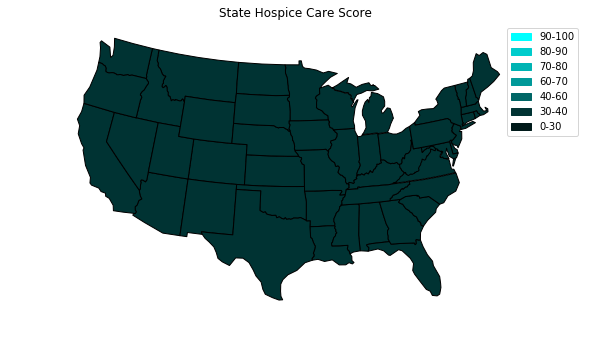

In [52]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

fig = plt.figure(figsize=(8,10))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

pal_score = {
    'Alabama' : 34,
    'Alaska' : 34,
    'Arizona':  34,
    'Arkansas':  34,
    'California':  34,
    'Colorado' : 34,
    'Connecticut': 34 ,
    'Delaware':    34,
    'District of Columbia': 34,
    'Florida':     34,
    'Georgia':     34,
    'Hawaii' : 34,
    'Idaho' : 34,
    'Illinois': 34,
    'Indiana':  34,
    'Iowa':  34,
    'Kansas':  34,
    'Kentucky':   34,
    'Louisiana':   34,
    'Maine': 34,
    'Maryland':   34,
    'Massachusetts': 34,
    'Michigan':    34,
    'Minnesota':  34,
    'Mississippi':   34,
    'Missouri':    34,
    'Montana':     34,
    'Nebraska':    34,
    'Nevada':  34,
    'New Hampshire':   34,
    'New Jersey': 34 ,
    'New Mexico':  34,
    'New York':  34 ,
    'North Carolina':  34,
    'North Dakota':  34,
    'Ohio':  34,
    'Oklahoma': 34,
    'Oregon':  34,
    'Pennsylvania':  34,
    'Rhode Island': 34 ,
    'South Carolina':  34,
    'South Dakota':  34,
    'Tennessee':   34,
    'Texas':   34,
    'Utah':  34,
    'Vermont':    34,
    'Virginia':    34,
    'Washington':  34,
    'West Virginia':   34,
    'Wisconsin':  34,     
    'Wyoming':  34}
    

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('State Hospice Care Score')


#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():


    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_score = pal_score[ astate.attributes['name'] ]
    except:
        state_score = 0

    # simple scheme to assign color to each state
    if state_score < 30:
        facecolor = [(0.0, 0.1, 0.1)]               
    elif state_score > 30 and state_score < 40:
        facecolor = [(0.0, 0.2, 0.2)]
    elif state_score >40 and state_score <60:
        facecolor = [(0.0, 0.4, 0.4)]
    elif state_score >60 and state_score <70:
        facecolor = [(0.0, 0.6, 0.6)]
    elif state_score >70 and state_score <80:
        facecolor = [(0.0, 0.7, 0.7)]
    elif state_score >80 and state_score <90:
        facecolor = [(0.0, 0.8, 0.8)]
    else:
        facecolor = [(0.0, 1.0, 1.0)]

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)   

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
ninetyplus = mpatches.Patch(color=(0.0, 1.0, 1.0), label='90-100')
eightyplus = mpatches.Patch(color=(0.0, .8, .8), label='80-90')
seventy_eighty= mpatches.Patch(color=(0.0, 0.7, 0.7), label='70-80')
sixt_sev= mpatches.Patch(color=(0.0, 0.6, 0.6), label='60-70')
fort_sixt= mpatches.Patch(color=(0.0, 0.4, 0.4), label='40-60')
thir_fort= mpatches.Patch(color=(0.0, 0.2, 0.2), label='30-40')
less_thirty = mpatches.Patch(color=(0.0, 0.1, 0.1), label='0-30')
plt.legend(handles=[ninetyplus, eightyplus, seventy_eighty,sixt_sev,fort_sixt,thir_fort,less_thirty ])

plt.show()




In [53]:
pwd


'/Users/Casey/Desktop/county'